In [6]:
# Importing necessary libraries
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For plotting graphs
import numpy as np  # For numerical operations

# Reading the CSV file into a DataFrame
df = pd.read_csv('Social_Network_Ads.csv')  # Load the dataset 'Social_Network_Ads.csv' into a pandas DataFrame

# Extracting the feature matrix (independent variables)
X = df.iloc[:, 2:4].values  # Select columns 2 and 3 (Age and EstimatedSalary) and convert them to a NumPy array

# Extracting the target vector (dependent variable)
y = df.iloc[:, 4].values  # Select column 4 (Purchased) and convert it to a NumPy array

# Displaying the first few rows of the DataFrame to understand the data structure
df.head()  # Display the first 5 rows of the DataFrame


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### Feature Scaling and Decision Trees
Feature scaling is not required for decision trees because they do not use Euclidean distance. Models based on some kind of distance metric, such as k-nearest neighbors (KNN) or support vector machines (SVM), require scaling.

In [7]:
# Import necessary modules from scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the dataset into training and testing sets
# X: Features (input data)
# y: Target (output labels)
# test_size=0.25: 25% of the data will be used for testing, 75% for training
# random_state=0: Ensures reproducibility of the split by setting a seed for the random number generator
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Initialize the StandardScaler
# StandardScaler standardizes features by removing the mean and scaling to unit variance
sc = StandardScaler()

# Fit the scaler on the training data and transform it
# fit_transform: Computes the mean and standard deviation on the training data, then scales the data
X_train = sc.fit_transform(X_train)

# Transform the test data using the same scaler
# transform: Uses the mean and standard deviation computed from the training data to scale the test data
X_test = sc.transform(X_test)


In [8]:
# Import the DecisionTreeClassifier from the sklearn.tree module
from sklearn.tree import DecisionTreeClassifier

# Initialize the DecisionTreeClassifier
# criterion='entropy': This parameter specifies the function to measure the quality of a split. 
#                      'entropy' uses the information gain as the criterion.
# random_state=0: This parameter ensures reproducibility of the results by setting a seed for the random number generator.
clf = DecisionTreeClassifier(criterion='entropy', random_state=0)

# Fit the classifier to the training data
# X_train: The training input samples.
# y_train: The target values (class labels) corresponding to the training input samples.
clf.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=0)

C:\Users\men_l\AppData\Local\Temp\ipykernel_42740\898255438.py:26: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


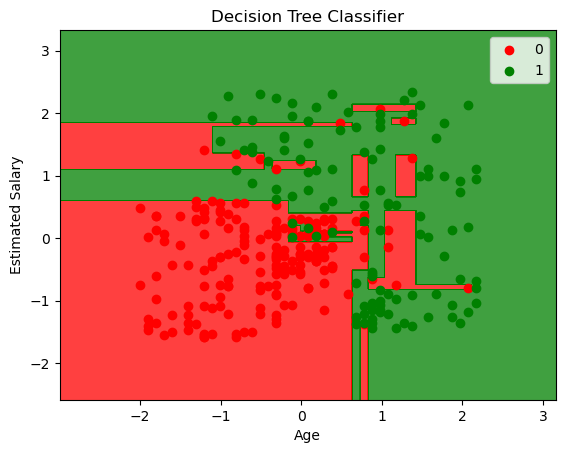

In [11]:
# Import necessary modules
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt

# Assign training data to variables for easier reference
X_set, y_set = X_train, y_train

# Generate a grid of points covering the feature space
# np.meshgrid creates a coordinate grid from the input arrays
# np.arange generates values from the minimum to the maximum of the first feature, with a step of 0.01
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

# Predict the class for each point in the grid
# clf.predict is used to classify each point in the grid
# np.array([X1.ravel(), X2.ravel()]).T reshapes the grid points into a format suitable for prediction
# reshape(X1.shape) reshapes the predictions back into the grid shape
plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))

# Plot the training points
# np.unique(y_set) returns the unique class labels
# plt.scatter plots the points, with different colors for each class
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)

# Set the limits of the plot to the limits of the grid
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Add titles and labels to the plot
plt.title('Decision Tree Classifier')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()  # Add a legend to the plot
plt.show()  # Display the plot


In [13]:
# Import the confusion_matrix function from sklearn.metrics
from sklearn.metrics import confusion_matrix

# Predict the target values for the test set
# X_test: The test input samples
# y_pred: The predicted target values for the test set
y_pred = clf.predict(X_test)

# Compute the confusion matrix to evaluate the accuracy of the classification
# y_test: The true target values for the test set
# y_pred: The predicted target values for the test set
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print(cm)


[[62  6]
 [ 3 29]]
